In [1]:
import requests,re, pandas as pd, matplotlib.pyplot as plt 
from bs4 import BeautifulSoup 

def read_in():


    res=requests.get('https://www.cdc.gov/sleep/data_statistics.html')

    print(res)

    #soup=BeautifulSoup(res.content,'html.parser')
    if int(res.status_code)==200:
        soup=BeautifulSoup(res.content,'html.parser')
 
        return soup 
  

In [2]:
def scrape():
    
    #pass in BS object:
    
    soup=read_in()
    
    
    table=soup.find("table")
    tlist=[]

    
    tdict={}

    
    index_var=0

    itemtextlist=[]
    for row in table.find_all('tr'):
    #print(row.find('td'))
        for td in row.find_all('td'):
            itemtextlist.append(row.find('td').text)
            if itemtextlist[index_var] != '':
                tdict[row.find('th').text]=itemtextlist[index_var]
            index_var+=1
   
    demog=list(tdict.keys())
    stats=list(tdict.values())
    
    df=pd.DataFrame({'Demographics':demog,"% with Short Sleep":stats})
    
    
    changed={'% with Short Sleep':float}
    df=df.astype(changed)
   # print(df.dtypes)
    return df

In [3]:
scrape()

<Response [200]>


,Demographics,% with Short Sleep
0,All Adultsa,35.2
1,Men,35.5
2,Women,34.8
3,18–24,32.2
4,25–34,37.9
5,35–44,38.3
6,45–54,39.0
7,55–64,35.6
8,≥65,26.3
9,White,33.4


In [3]:
def visualize ():
    
    #pass in the df

    df=scrape()
    
   # print(df)
    df.plot(x='Demographics',y='% with Short Sleep',kind='bar',fontsize=14,legend=False, figsize=(8,8))
    plt.ylabel('% with Short Sleep', fontsize=13)
    plt.xlabel('Demographics', fontsize=13)
    plt.title('Demographic Breakdown of Americans with Short Sleep', fontsize=12)
    plt.show()
    
    
    
    

<Response [200]>


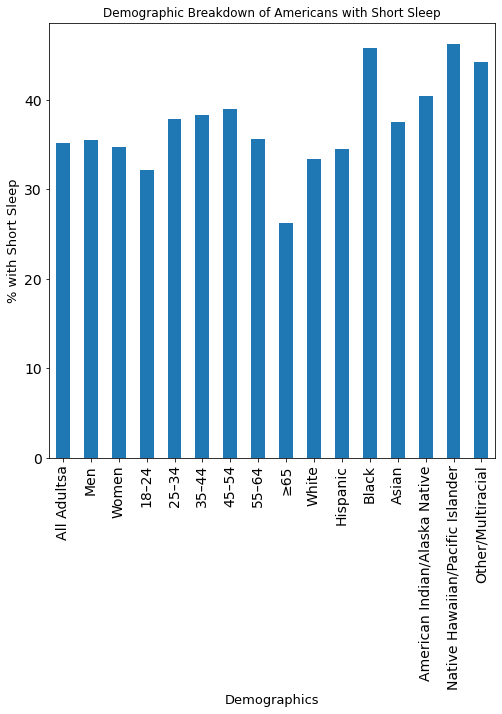

In [4]:
visualize()